# Centrality Measure

In [ ]:
Centrality measures can be used to predict (positive or negative) outcomes for a node.
Your task in this week’s assignment is to identify an interesting set of network data that is available on 
the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures 
across nodes.  As an additional constraint, there should be at least one categorical variable available for each 
node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.). In addition to identifying your data source,
you should create a high level plan that describes how you would load the data for analysis, and describe a hypothetical 
outcome that could be predicted from comparing degree centrality across categorical groups. 

### Summary of the data

This undirected network contains co-occurances of characters in Victor Hugo's novel 'Les Misérables'.
A node represents a character and an edge between two nodes shows that these two characters appeared in the same chapter 
of the the book. The weight of each link indicates how often such a co-appearance occured.

description: Character–character co-occurences
entity-names: character
extr: moreno
url: http://moreno.ss.uci.edu/data.html#lesmis
long-description: This undirected network contains co-occurances of characters in Victor Hugo's novel 'Les Misérables'. 
A node represents a character and an edge between two nodes shows that these two characters appeared in the same chapter 
of the the book. The weight of each link indicates how often such a co-appearance occured.
relationship-names: co-occurence
    
Data source: http://users.csc.calpoly.edu/~dekhtyar/466-Spring2018/labs/lab05.html

In [72]:
#!pip install networkx
#pip install ifsFractals --upgrade
#!pip install nxviz
#https://networkx.org/documentation/stable/tutorial.html
#https://www.youtube.com/watch?v=o5-o1EPSWZg...> network analysis

In [73]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
import pandas as pd
import seaborn as sns
sns.set()
import random 
import operator
import numpy as np
import tarfile
import csv
import networkx as nx
import nxviz as nv #nxviz is a package for building rational network visualizations using matplotlib as a backend.
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as aprx
#from matplotlib import animation, cbook
from collections import Counter

In [3]:
tar = tarfile.open('download.tsv.moreno_lesmis.tar.bz2')
tar.extractall() # specify which folder to extract to
tar.close()
#https://docs.python.org/3/library/tarfile.html

In [74]:
# Import the data 
#url = 'http://users.csc.calpoly.edu/~dekhtyar/466-Spring2018/labs/lab5/lesmis.gml'
#,sep = "\t", encoding='latin'
G = nx.read_gml('lesmiserables.gml', label='id') # encoding = 'utf-16')
#print(G.edges)
#print(G.nodes)
    
print(nx.info(G))


Graph with 77 nodes and 254 edges


C:\Users\owner\AppData\Local\Temp\ipykernel_14152\1509573907.py:8: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [5]:
G.number_of_edges() #number of edges 

254

In [6]:
# Number of nodes present
G.number_of_nodes()

77

Centrality checks on the number of direction connections that a node or a group of nodes has with others 

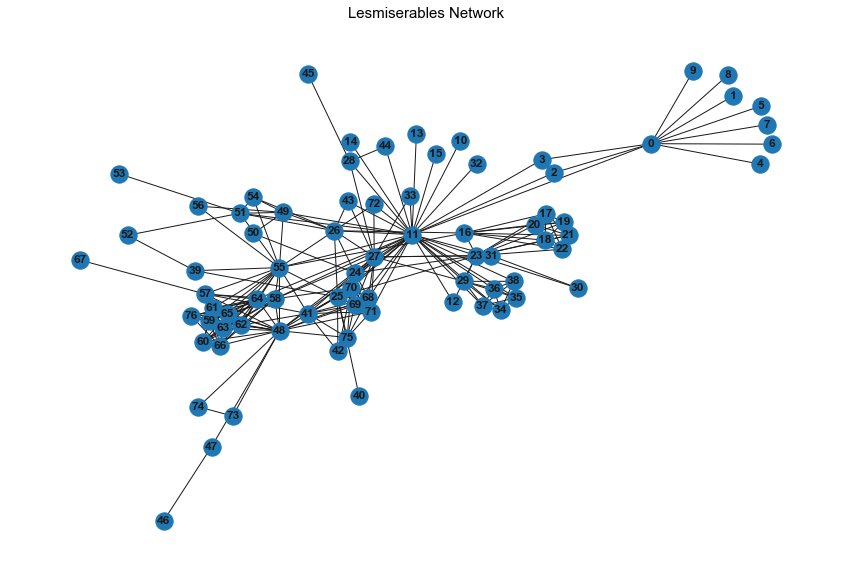

In [15]:
## adding figure plotting size
fig = plt.figure(figsize = (15, 10))
plt.title(label="Lesmiserables Network",fontsize=15,color="black")

# Setting up position of G...what kind of geometry we want our graph to look like
pos = nx.spring_layout(G, seed = 3322)
# Graphing G
nx.draw(G, pos, with_labels=True, font_weight='bold')



In [70]:
#Let's see the name of actors and their Id
actors = G.nodes('label')
print(actors)

[(0, 'Myriel'), (1, 'Napoleon'), (2, 'MlleBaptistine'), (3, 'MmeMagloire'), (4, 'CountessDeLo'), (5, 'Geborand'), (6, 'Champtercier'), (7, 'Cravatte'), (8, 'Count'), (9, 'OldMan'), (10, 'Labarre'), (11, 'Valjean'), (12, 'Marguerite'), (13, 'MmeDeR'), (14, 'Isabeau'), (15, 'Gervais'), (16, 'Tholomyes'), (17, 'Listolier'), (18, 'Fameuil'), (19, 'Blacheville'), (20, 'Favourite'), (21, 'Dahlia'), (22, 'Zephine'), (23, 'Fantine'), (24, 'MmeThenardier'), (25, 'Thenardier'), (26, 'Cosette'), (27, 'Javert'), (28, 'Fauchelevent'), (29, 'Bamatabois'), (30, 'Perpetue'), (31, 'Simplice'), (32, 'Scaufflaire'), (33, 'Woman1'), (34, 'Judge'), (35, 'Champmathieu'), (36, 'Brevet'), (37, 'Chenildieu'), (38, 'Cochepaille'), (39, 'Pontmercy'), (40, 'Boulatruelle'), (41, 'Eponine'), (42, 'Anzelma'), (43, 'Woman2'), (44, 'MotherInnocent'), (45, 'Gribier'), (46, 'Jondrette'), (47, 'MmeBurgon'), (48, 'Gavroche'), (49, 'Gillenormand'), (50, 'Magnon'), (51, 'MlleGillenormand'), (52, 'MmePontmercy'), (53, 'MlleV

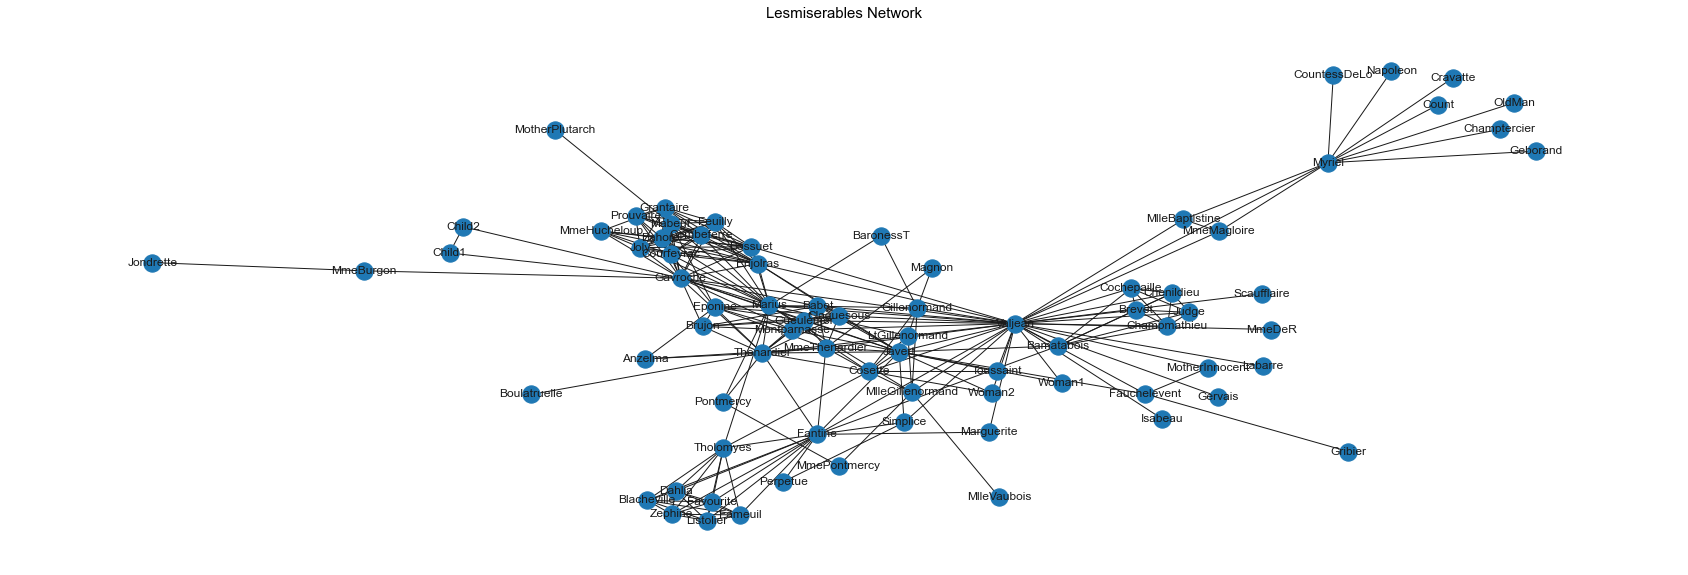

In [20]:
## adding figure plotting size
fig = plt.figure(figsize = (30, 10))
plt.title(label="Lesmiserables Network",fontsize=15,color="black")

# Setting up position of G...what kind of geometry we want our graph to look like
pos = nx.spring_layout(G, seed = 623)
# Graphing G
nx.draw(G, pos) #, with_labels=True, font_weight='bold')

# Each node in G has attribute, let's see those
node_label = nx.get_node_attributes(G, 'label')

# Let's add the node attribute to the graph
nx.draw_networkx_labels(G, pos, labels = node_label)
plt.show()
#C = nv.CircosPlot(G)
#C.draw()
#plt.show()

Let's see if we can adjust the labels

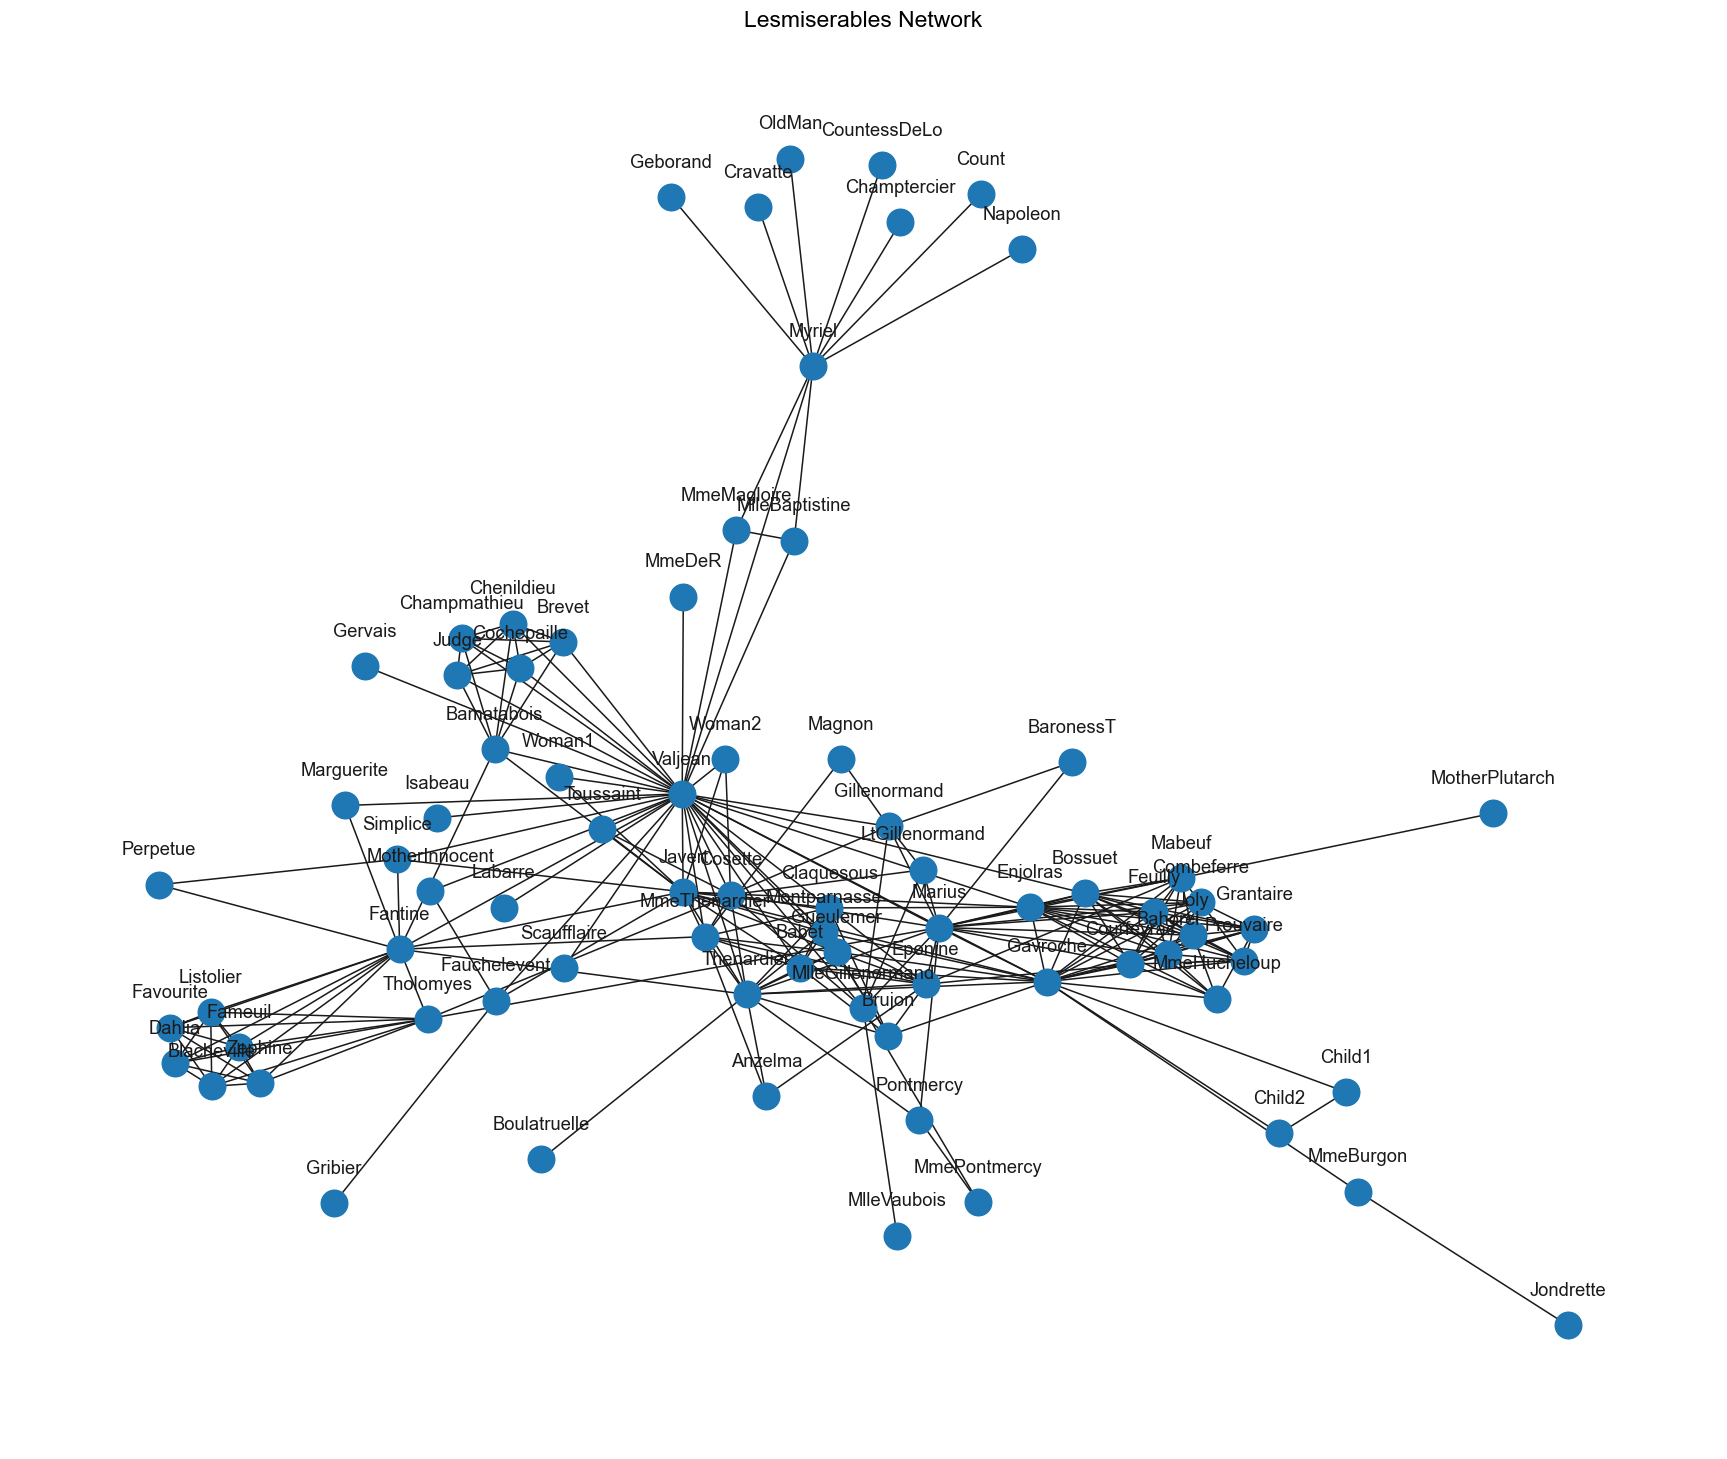

In [22]:
#random.seed(33442)
## adding figure plotting size
#fig = plt.figure(figsize = (30, 10))
fig = plt.figure(1, figsize=(20,17), dpi=110)

plt.title(label="Lesmiserables Network",fontsize=15,color="black")

# Setting up position of G...what kind of geometry we want our graph to look like
pos = nx.spring_layout(G, seed = 849) #, seed = 9394
# Graphing G
nx.draw(G, pos) #, with_labels=True, font_weight='bold')

pos_attr = {}
for node, coords in pos.items():
    pos_attr[node] = (coords[0], coords[1] + 0.05)
# Each node in G has attribute, let's see those
node_label = nx.get_node_attributes(G, 'label')

# Let's add the node attribute to the graph
nx.draw_networkx_labels(G, pos_attr, labels = node_label)
plt.show()
#https://stackoverflow.com/questions/46244899/labeling-networkx-node-attributes-outside-of-nodes

In [23]:
#Let's check if G has some weights
#def is_weighted(G, edge=None, weight="weight"):

nx.is_weighted(G)
#https://networkx.org/documentation/stable/_modules/networkx/classes/function.html#is_weighted

False

In [24]:
# wonder if there is edges attribute
x = 0
edge_label = nx.get_edge_attributes(G, 'label')
if x in edge_label:
    print('yes, there are some edge attribute in G')
else:
    print('No, there is no edge attribute in G')

#fig = plt.figure(1, figsize=(20,17), dpi=110)

#plt.title(label="Lesmiserables Network",fontsize=15,color="black")

# Setting up position of G...what kind of geometry we want our graph to look like
#pos = nx.spring_layout(G)
# Graphing G
#nx.draw(G, pos) #, with_labels=True, font_weight='bold')

#pos_attr = {}
#for node, coords in pos.items():
#    pos_attr[node] = (coords[0], coords[1] + 0.05)
# Each node in G has attribute, let's see those
#edge_label = nx.get_edge_attributes(G, 'label')

# Let's add the node attribute to the graph
#nx.draw_networkx_labels(G, pos_attr, labels = edge_label)
#plt.show()

No, there is no edge attribute in G


#### Centrality Measure
Measure power and influences

 ###### Degree centrality
 A node degree is the number of connections that a node has.

In [25]:
deg = nx.degree(G)
[deg]

[DegreeView({0: 10, 1: 1, 2: 3, 3: 3, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 36, 12: 2, 13: 1, 14: 1, 15: 1, 16: 9, 17: 7, 18: 7, 19: 7, 20: 7, 21: 7, 22: 7, 23: 15, 24: 11, 25: 16, 26: 11, 27: 17, 28: 4, 29: 8, 30: 2, 31: 4, 32: 1, 33: 2, 34: 6, 35: 6, 36: 6, 37: 6, 38: 6, 39: 3, 40: 1, 41: 11, 42: 3, 43: 3, 44: 2, 45: 1, 46: 1, 47: 2, 48: 22, 49: 7, 50: 2, 51: 7, 52: 2, 53: 1, 54: 4, 55: 19, 56: 2, 57: 11, 58: 15, 59: 11, 60: 9, 61: 11, 62: 13, 63: 12, 64: 13, 65: 12, 66: 10, 67: 1, 68: 10, 69: 10, 70: 10, 71: 9, 72: 3, 73: 2, 74: 2, 75: 7, 76: 7})]

In [26]:
print("Top 10 Popular Actors ")
#degree_centrality = nx.degree_centrality(G)
sorted(deg, reverse= True, key=lambda x: x[1])[:10]

Top 10 Popular Actors 


[(11, 36),
 (48, 22),
 (55, 19),
 (27, 17),
 (25, 16),
 (23, 15),
 (58, 15),
 (62, 13),
 (64, 13),
 (63, 12)]

In [27]:
#deg = dict(G.degree(G.nodes()))
#nx.set_node_attributes(G, degree_dict, 'degree')
#sorted_degree = sorted(deg.items(), key=operator.itemgetter(1), reverse=True)
#print("Top 10 Popular Actors\n")
#for i in sorted_degree[:10]:
#    print(i)
    
#(11, 'Valjean')
#(48, 'Gavroche')
#(55, 'Marius')
#(27, 'Javert')
#(25, 'Thenardier')
#(23, 'Fantine'),
#(58, 'Enjolras')
#(62, 'Courfeyrac')
#(64, 'Bossuet')
#(63, 'Bahorel')

(array([36., 15., 15.,  4.,  4.,  1.,  1.,  0.,  0.,  1.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

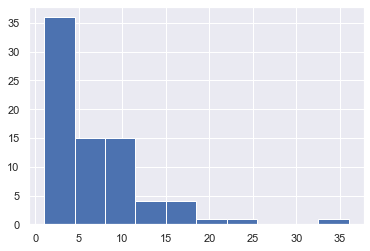

In [28]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
#degrees = pd.DataFrame(G.degree(), columns=['Node', 'Degree'])
#sns.distplot(a = degrees['Degree'], kde=False)

##### Betweenness Centrality
Betweenness Centrality is another centrality that is based on shortest path between nodes.
Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.
It is determined as number of the shortest paths passing by the given node. 
Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. 


In [30]:
btw = nx.betweenness_centrality(G)

print("Top 10 Influentials/Adjuvant Actors ")
#degree_centrality = nx.degree_centrality(G)
sorted(btw.items(), reverse= True, key=lambda x: x[1])[:10]
#for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
#  print(node, degree_centrality[node])

Top 10 Influentials Actors 


[(11, 0.5699890527836184),
 (0, 0.17684210526315788),
 (48, 0.16511250242584766),
 (55, 0.132032488621946),
 (23, 0.12964454098819422),
 (25, 0.07490122123424225),
 (27, 0.05433155966478436),
 (51, 0.047598927875243675),
 (58, 0.0425533568221771),
 (16, 0.04062934817733579)]

##### Closeness Centrality
The measure of a distance from each node to all other nodes in the network
https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

In [71]:
print("Top 10 Actors who played in more scenes...not sure")

closnss = nx.closeness_centrality(G)
sorted(closnss.items(), reverse= True, key=lambda x: x[1])[:10]


Top 10 Figurants Actors 


[(11, 0.6440677966101694),
 (55, 0.5314685314685315),
 (25, 0.5170068027210885),
 (27, 0.5170068027210885),
 (48, 0.5135135135135135),
 (58, 0.4810126582278481),
 (26, 0.4779874213836478),
 (64, 0.475),
 (68, 0.4634146341463415),
 (69, 0.4634146341463415)]

##### Eigenvector Centrality
Measures a node’s influence based on the number of links it has to other nodes in the network. 

In [256]:
eigenvector_centrality = nx.eigenvector_centrality(G)
print("Top 10 Influentials Actors ")
#degree_centrality = nx.degree_centrality(G)
sorted(eigenvector_centrality.items(), reverse= True, key=lambda x: x[1])[:10]

Top 10 Influentials Actors 


[(48, 0.3178389397749768),
 (11, 0.2676181759885394),
 (58, 0.2671786328235667),
 (55, 0.25911114534178753),
 (64, 0.24213078637474136),
 (62, 0.23246719717021408),
 (63, 0.22155360926119969),
 (65, 0.22155360926119969),
 (59, 0.21073457488115618),
 (61, 0.21073457488115618)]

In [ ]:
#### Max Clique
A clique is a complete subset of a graph(all nodes are connected).
A maximal clique is a number of node in a clique
An Induced Subgraph G[S] on vertices S of graph G(V, E) is a graph such that S ⊂ V and the edge set of G[S] consists of all 
of the edges in E that have both endpoints in S.
https://mathworld.wolfram.com/MaximalClique.html
https://www.geeksforgeeks.org/maximal-clique-problem-recursive-solution/

In [41]:
#A Clique C of graph G is any Induced Subgraph of G that is also a Complete Graph
aprx.max_clique(G)


{48, 57, 58, 59, 61, 62, 63, 64, 65}

In [42]:
len(aprx.max_clique(G))

9

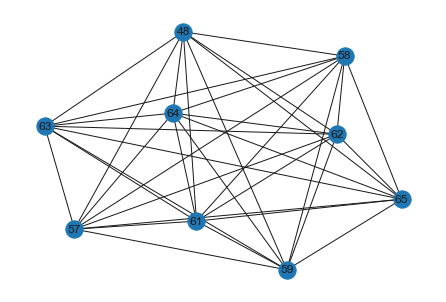

In [68]:
nx.draw(G.subgraph(aprx.max_clique(G)), with_labels=True)
#Looks like the most intense scene

##### Let's see the graph of the highest node degree

In [46]:
G.edges(11) ##nx.edges(G, 11)

EdgeDataView([(11, 10), (11, 3), (11, 2), (11, 0), (11, 12), (11, 13), (11, 14), (11, 15), (11, 23), (11, 24), (11, 25), (11, 26), (11, 27), (11, 28), (11, 29), (11, 31), (11, 32), (11, 33), (11, 34), (11, 35), (11, 36), (11, 37), (11, 38), (11, 43), (11, 44), (11, 48), (11, 49), (11, 51), (11, 55), (11, 58), (11, 64), (11, 68), (11, 69), (11, 70), (11, 71), (11, 72)])

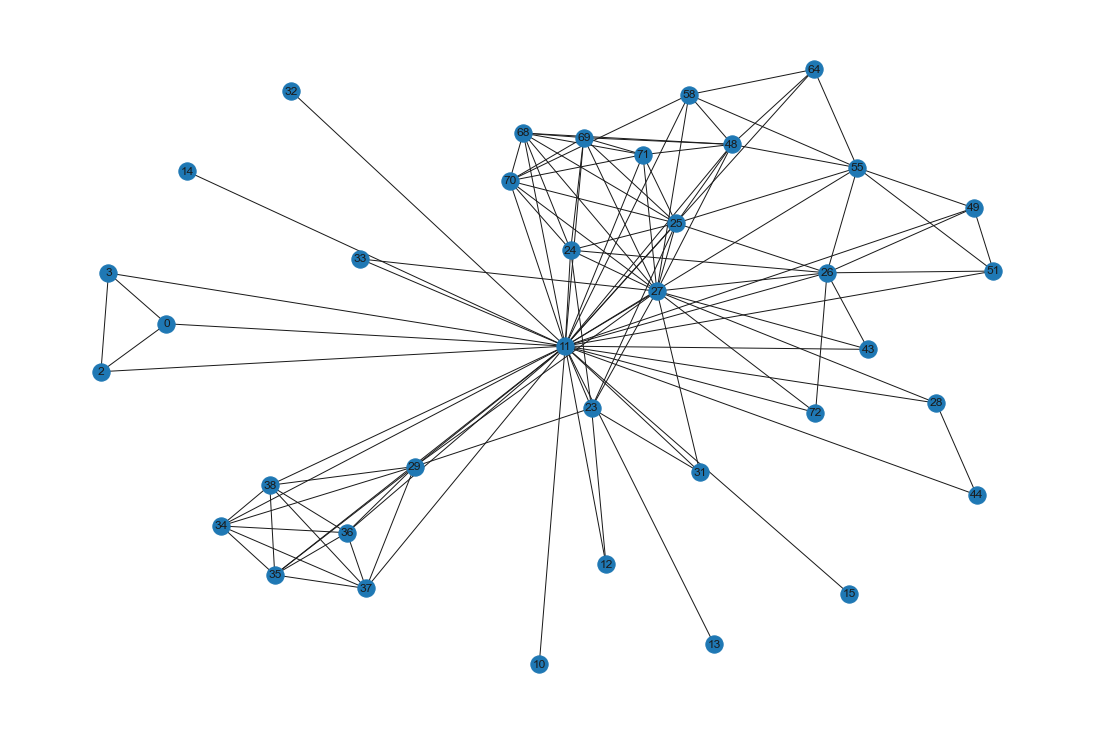

In [62]:
fig = plt.figure(figsize = (15, 10))
#fig = plt.figure(1, figsize=(20,10), dpi=200)
G11 = nx.Graph(G.edges(11))
nx.draw(G.subgraph(G11), with_labels=True)
plt.show()

I found 02 sources confirming that the actors with highest degree were indeed recognize for best character role in les Miserables 
    Jean Valjean: Colm Wilkinson. ...
    Javert: Norm Lewis. ...
    Éponine: Samantha Barks. ...
    Fantine: Ruthie Henshall. ...
    Cosette: Rebecca Caine. ...
    Marius: Michael Ball. ...
    Thénardier: Matt Lucas. ...
    Enjolras: Killian Donnelly.
https://www.officialtheatre.com/blog/the-ultimate-les-miserables-all-stars-ots-dream-cast/
https://www.pbs.org/wgbh/masterpiece/specialfeatures/les-miserables-cast-characters-whos-who/#